In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd.variable import Variable
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Generate some real time-series data
def generate_real_samples(n):
    data = np.random.randn(n)
    return data

# Generator network
class Generator(nn.Module):
    def __init__(self, latent_dim=128):
        super(Generator, self).__init__()
        self.latent_dim = latent_dim
        self.model = nn.Sequential(
            nn.Linear(self.latent_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.model(x)

# Discriminator network
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Dropout(p=0.2),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Function to train the discriminator
def train_discriminator(discriminator, optimizer, real_data, fake_data):
    optimizer.zero_grad()

    # Train on real data
    prediction_real = discriminator(real_data)
    error_real = loss(prediction_real, torch.ones_like(prediction_real))
    error_real.backward()

    # Train on fake data
    prediction_fake = discriminator(fake_data.detach())
    error_fake = loss(prediction_fake, torch.zeros_like(prediction_fake))
    error_fake.backward()

    optimizer.step()

    return error_real + error_fake

# Function to train the generator
def train_generator(generator, optimizer, fake_data):
    optimizer.zero_grad()

    prediction = discriminator(fake_data)
    error = loss(prediction, torch.ones_like(prediction))
    error.backward()

    optimizer.step()

    return error

# Hyperparameters
batch_size = 128
lr = 3e-4
epochs = 5000

# Models and optimizer
generator = Generator()
discriminator = Discriminator()
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)
loss = nn.BCELoss()

# Training Loop
for epoch in range(epochs):
    # Generate real and fake data
    real_data = torch.Tensor(generate_real_samples(batch_size)).view(-1, 1)
    fake_data = generator(torch.randn(batch_size, 128))

    # Train discriminator
    d_loss = train_discriminator(discriminator, optimizer_D, real_data, fake_data)

    # Train generator
    g_loss = train_generator(generator, optimizer_G, fake_data)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, D Loss: {d_loss.item()}, G Loss: {g_loss.item()}")


Epoch: 0, D Loss: 1.3965715169906616, G Loss: 0.6834033131599426
Epoch: 100, D Loss: 1.0638478994369507, G Loss: 0.9575257301330566
Epoch: 200, D Loss: 1.1360771656036377, G Loss: 1.3875950574874878
Epoch: 300, D Loss: 1.6443109512329102, G Loss: 0.6061020493507385
Epoch: 400, D Loss: 1.3614649772644043, G Loss: 0.7266992926597595
Epoch: 500, D Loss: 1.2738425731658936, G Loss: 0.7417293787002563
Epoch: 600, D Loss: 1.3857011795043945, G Loss: 0.7215775847434998
Epoch: 700, D Loss: 1.4511444568634033, G Loss: 0.7075508236885071
Epoch: 800, D Loss: 1.4021670818328857, G Loss: 0.6933244466781616
Epoch: 900, D Loss: 1.3836674690246582, G Loss: 0.6778149008750916
Epoch: 1000, D Loss: 1.3758561611175537, G Loss: 0.7081418037414551
Epoch: 1100, D Loss: 1.380200743675232, G Loss: 0.7209746241569519
Epoch: 1200, D Loss: 1.3867130279541016, G Loss: 0.7032424211502075
Epoch: 1300, D Loss: 1.372441053390503, G Loss: 0.6852929592132568
Epoch: 1400, D Loss: 1.3812663555145264, G Loss: 0.70365840196

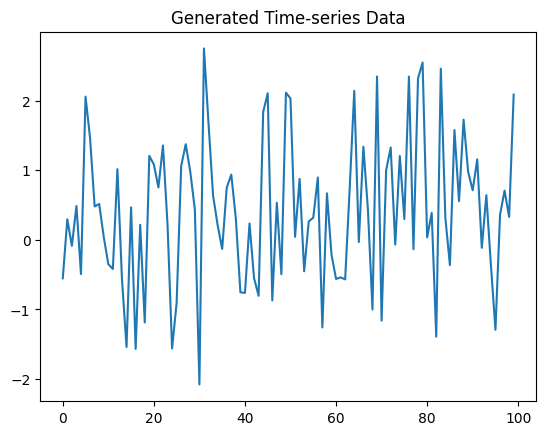

In [ ]:
latent_dim = 128
# Generate synthetic time-series data using the trained generator
generated_data = generator(Variable(torch.randn(100, latent_dim))).detach().numpy()

#Plot the generated data
plt.plot(generated_data)
plt.title("Generated Time-series Data")
plt.show()